## https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [2]:
# Example taken from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA
# Import the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns 
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing

In [3]:
mydf= pd.read_csv('combo.csv', delimiter=',')
mydf


,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration,drivingStyle,roadSurface,traffic
0,-2.299988,68.0,4.705883,1796.0,19.497335,24.0,0.3555,106.0,15.810000,13.223501,25.670519,121.592690,-2.476980,-0.1133,EvenPaceStyle,SmoothCondition,LowCongestionCondition
1,-2.099976,68.0,10.588236,1689.0,19.515722,22.0,0.4492,103.0,14.650000,13.638919,24.094259,120.422571,-1.576260,-0.1289,EvenPaceStyle,SmoothCondition,LowCongestionCondition
2,-1.500000,68.0,27.450981,1599.0,19.441765,21.0,0.4258,103.0,11.850000,14.031043,22.743179,118.456769,-1.351080,-0.1328,EvenPaceStyle,SmoothCondition,LowCongestionCondition
3,0.100037,69.0,24.313726,1620.0,19.388769,20.0,0.4140,104.0,12.210000,14.171073,22.292820,117.571308,-0.450359,-0.0859,EvenPaceStyle,SmoothCondition,LowCongestionCondition
4,0.099976,69.0,20.000000,1708.0,19.301638,21.0,0.3945,104.0,11.910000,14.328954,23.643900,117.074149,1.351080,-0.0664,EvenPaceStyle,SmoothCondition,LowCongestionCondition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,1.000000,81.0,25.882353,1755.5,14.578003,25.0,-0.0292,115.0,20.469999,28.559999,28.799999,57.190571,3.600000,-0.1661,EvenPaceStyle,SmoothCondition,LowCongestionCondition
23771,1.699997,81.0,11.764706,736.5,14.585642,25.0,-0.0304,106.0,17.740000,28.529999,30.599998,57.010266,1.799999,-0.1987,EvenPaceStyle,SmoothCondition,LowCongestionCondition
23772,1.800003,81.0,98.039215,1254.0,14.547294,24.0,-0.1684,106.0,9.520000,28.499999,29.699999,56.883045,-0.900000,-0.1156,EvenPaceStyle,SmoothCondition,LowCongestionCondition
23773,2.100006,80.0,79.607841,1254.0,14.546828,23.0,-0.0644,112.0,14.910000,28.409999,29.699999,56.160910,0.000000,-0.0760,EvenPaceStyle,SmoothCondition,LowCongestionCondition


In [4]:
# encode the extra cat features
from sklearn.preprocessing import LabelEncoder


lb_make = LabelEncoder()
mydf["traffic"] = lb_make.fit_transform(mydf["traffic"])
mydf["drivingStyle"] = lb_make.fit_transform(mydf["drivingStyle"])
mydf["roadSurface"] = lb_make.fit_transform(mydf["roadSurface"])
mydf


,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration,drivingStyle,roadSurface,traffic
0,-2.299988,68.0,4.705883,1796.0,19.497335,24.0,0.3555,106.0,15.810000,13.223501,25.670519,121.592690,-2.476980,-0.1133,1,1,1
1,-2.099976,68.0,10.588236,1689.0,19.515722,22.0,0.4492,103.0,14.650000,13.638919,24.094259,120.422571,-1.576260,-0.1289,1,1,1
2,-1.500000,68.0,27.450981,1599.0,19.441765,21.0,0.4258,103.0,11.850000,14.031043,22.743179,118.456769,-1.351080,-0.1328,1,1,1
3,0.100037,69.0,24.313726,1620.0,19.388769,20.0,0.4140,104.0,12.210000,14.171073,22.292820,117.571308,-0.450359,-0.0859,1,1,1
4,0.099976,69.0,20.000000,1708.0,19.301638,21.0,0.3945,104.0,11.910000,14.328954,23.643900,117.074149,1.351080,-0.0664,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,1.000000,81.0,25.882353,1755.5,14.578003,25.0,-0.0292,115.0,20.469999,28.559999,28.799999,57.190571,3.600000,-0.1661,1,1,1
23771,1.699997,81.0,11.764706,736.5,14.585642,25.0,-0.0304,106.0,17.740000,28.529999,30.599998,57.010266,1.799999,-0.1987,1,1,1
23772,1.800003,81.0,98.039215,1254.0,14.547294,24.0,-0.1684,106.0,9.520000,28.499999,29.699999,56.883045,-0.900000,-0.1156,1,1,1
23773,2.100006,80.0,79.607841,1254.0,14.546828,23.0,-0.0644,112.0,14.910000,28.409999,29.699999,56.160910,0.000000,-0.0760,1,1,1


In [5]:
mydf.isna().sum()

AltitudeVariation            0
EngineCoolantTemperature     5
EngineLoad                   5
EngineRPM                    5
FuelConsumptionAverage       5
IntakeAirTemperature         5
LongitudinalAcceleration     0
ManifoldAbsolutePressure     5
MassAirFlow                  5
VehicleSpeedAverage          0
VehicleSpeedInstantaneous    9
VehicleSpeedVariance         0
VehicleSpeedVariation        0
VerticalAcceleration         0
drivingStyle                 0
roadSurface                  0
traffic                      0
dtype: int64

In [6]:
mydf = mydf.dropna(how='any',axis=0) 

In [7]:
mydf.isna().sum()

AltitudeVariation            0
EngineCoolantTemperature     0
EngineLoad                   0
EngineRPM                    0
FuelConsumptionAverage       0
IntakeAirTemperature         0
LongitudinalAcceleration     0
ManifoldAbsolutePressure     0
MassAirFlow                  0
VehicleSpeedAverage          0
VehicleSpeedInstantaneous    0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
VerticalAcceleration         0
drivingStyle                 0
roadSurface                  0
traffic                      0
dtype: int64

In [8]:
mydf

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration,drivingStyle,roadSurface,traffic
0,-2.299988,68.0,4.705883,1796.0,19.497335,24.0,0.3555,106.0,15.810000,13.223501,25.670519,121.592690,-2.476980,-0.1133,1,1,1
1,-2.099976,68.0,10.588236,1689.0,19.515722,22.0,0.4492,103.0,14.650000,13.638919,24.094259,120.422571,-1.576260,-0.1289,1,1,1
2,-1.500000,68.0,27.450981,1599.0,19.441765,21.0,0.4258,103.0,11.850000,14.031043,22.743179,118.456769,-1.351080,-0.1328,1,1,1
3,0.100037,69.0,24.313726,1620.0,19.388769,20.0,0.4140,104.0,12.210000,14.171073,22.292820,117.571308,-0.450359,-0.0859,1,1,1
4,0.099976,69.0,20.000000,1708.0,19.301638,21.0,0.3945,104.0,11.910000,14.328954,23.643900,117.074149,1.351080,-0.0664,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,1.000000,81.0,25.882353,1755.5,14.578003,25.0,-0.0292,115.0,20.469999,28.559999,28.799999,57.190571,3.600000,-0.1661,1,1,1
23771,1.699997,81.0,11.764706,736.5,14.585642,25.0,-0.0304,106.0,17.740000,28.529999,30.599998,57.010266,1.799999,-0.1987,1,1,1
23772,1.800003,81.0,98.039215,1254.0,14.547294,24.0,-0.1684,106.0,9.520000,28.499999,29.699999,56.883045,-0.900000,-0.1156,1,1,1
23773,2.100006,80.0,79.607841,1254.0,14.546828,23.0,-0.0644,112.0,14.910000,28.409999,29.699999,56.160910,0.000000,-0.0760,1,1,1


In [9]:
#reset the index. Very important when splitting and merging - had some issues
mydf.reset_index(drop=True, inplace=True)
mydf

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration,drivingStyle,roadSurface,traffic
0,-2.299988,68.0,4.705883,1796.0,19.497335,24.0,0.3555,106.0,15.810000,13.223501,25.670519,121.592690,-2.476980,-0.1133,1,1,1
1,-2.099976,68.0,10.588236,1689.0,19.515722,22.0,0.4492,103.0,14.650000,13.638919,24.094259,120.422571,-1.576260,-0.1289,1,1,1
2,-1.500000,68.0,27.450981,1599.0,19.441765,21.0,0.4258,103.0,11.850000,14.031043,22.743179,118.456769,-1.351080,-0.1328,1,1,1
3,0.100037,69.0,24.313726,1620.0,19.388769,20.0,0.4140,104.0,12.210000,14.171073,22.292820,117.571308,-0.450359,-0.0859,1,1,1
4,0.099976,69.0,20.000000,1708.0,19.301638,21.0,0.3945,104.0,11.910000,14.328954,23.643900,117.074149,1.351080,-0.0664,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23757,1.000000,81.0,25.882353,1755.5,14.578003,25.0,-0.0292,115.0,20.469999,28.559999,28.799999,57.190571,3.600000,-0.1661,1,1,1
23758,1.699997,81.0,11.764706,736.5,14.585642,25.0,-0.0304,106.0,17.740000,28.529999,30.599998,57.010266,1.799999,-0.1987,1,1,1
23759,1.800003,81.0,98.039215,1254.0,14.547294,24.0,-0.1684,106.0,9.520000,28.499999,29.699999,56.883045,-0.900000,-0.1156,1,1,1
23760,2.100006,80.0,79.607841,1254.0,14.546828,23.0,-0.0644,112.0,14.910000,28.409999,29.699999,56.160910,0.000000,-0.0760,1,1,1


In [10]:
X = mydf.drop(columns=['roadSurface', 'drivingStyle','traffic'])
X

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration
0,-2.299988,68.0,4.705883,1796.0,19.497335,24.0,0.3555,106.0,15.810000,13.223501,25.670519,121.592690,-2.476980,-0.1133
1,-2.099976,68.0,10.588236,1689.0,19.515722,22.0,0.4492,103.0,14.650000,13.638919,24.094259,120.422571,-1.576260,-0.1289
2,-1.500000,68.0,27.450981,1599.0,19.441765,21.0,0.4258,103.0,11.850000,14.031043,22.743179,118.456769,-1.351080,-0.1328
3,0.100037,69.0,24.313726,1620.0,19.388769,20.0,0.4140,104.0,12.210000,14.171073,22.292820,117.571308,-0.450359,-0.0859
4,0.099976,69.0,20.000000,1708.0,19.301638,21.0,0.3945,104.0,11.910000,14.328954,23.643900,117.074149,1.351080,-0.0664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23757,1.000000,81.0,25.882353,1755.5,14.578003,25.0,-0.0292,115.0,20.469999,28.559999,28.799999,57.190571,3.600000,-0.1661
23758,1.699997,81.0,11.764706,736.5,14.585642,25.0,-0.0304,106.0,17.740000,28.529999,30.599998,57.010266,1.799999,-0.1987
23759,1.800003,81.0,98.039215,1254.0,14.547294,24.0,-0.1684,106.0,9.520000,28.499999,29.699999,56.883045,-0.900000,-0.1156
23760,2.100006,80.0,79.607841,1254.0,14.546828,23.0,-0.0644,112.0,14.910000,28.409999,29.699999,56.160910,0.000000,-0.0760


In [11]:
y = mydf["roadSurface"]
len(y)
y

0        1
1        1
2        1
3        1
4        1
        ..
23757    1
23758    1
23759    1
23760    1
23761    1
Name: roadSurface, Length: 23762, dtype: int32

In [12]:

features = ['AltitudeVariation','EngineCoolantTemperature','EngineLoad','EngineRPM','FuelConsumptionAverage',\
'IntakeAirTemperature','LongitudinalAcceleration','ManifoldAbsolutePressure',\
            'MassAirFlow','VehicleSpeedAverage','VehicleSpeedInstantaneous','VehicleSpeedVariance',\
            'VehicleSpeedVariation','VerticalAcceleration']


In [13]:
# used MinMax instead of standardisation because chi2 later does not like negative values.
minmax_scale = preprocessing.MinMaxScaler().fit(X)
df_minmax = minmax_scale.transform(X)
df_minmax


array([[0.61944482, 0.72727273, 0.04705883, ..., 0.08572704, 0.13474845,
        0.12796083],
       [0.62500071, 0.72727273, 0.10588236, ..., 0.08490206, 0.14256721,
        0.12720749],
       [0.6416667 , 0.72727273, 0.27450981, ..., 0.08351611, 0.14452189,
        0.12701916],
       ...,
       [0.73333343, 0.8961039 , 0.98039215, ..., 0.04010451, 0.14843752,
        0.12784976],
       [0.74166685, 0.88311688, 0.79607841, ..., 0.03959538, 0.15625002,
        0.12976207],
       [0.72500002, 0.88311688, 0.8       , ..., 0.0390172 , 0.18750002,
        0.13051058]])

In [14]:
X = df_minmax

In [15]:
len(X)

23762

In [16]:
X = pd.DataFrame(data=X, columns=[features])

In [17]:
X

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration
0,0.619445,0.727273,0.047059,0.567098,0.321173,0.293103,0.296332,0.109756,0.206301,0.108987,0.205776,0.085727,0.134748,0.127961
1,0.625001,0.727273,0.105882,0.533312,0.321656,0.258621,0.304450,0.091463,0.190272,0.112411,0.193141,0.084902,0.142567,0.127207
2,0.641667,0.727273,0.274510,0.504894,0.319713,0.241379,0.302422,0.091463,0.151582,0.115643,0.182310,0.083516,0.144522,0.127019
3,0.686112,0.740260,0.243137,0.511525,0.318321,0.224138,0.301400,0.097561,0.156557,0.116797,0.178700,0.082892,0.152341,0.129284
4,0.686110,0.740260,0.200000,0.539312,0.316032,0.241379,0.299711,0.097561,0.152411,0.118098,0.189531,0.082541,0.167978,0.130226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23757,0.711111,0.896104,0.258824,0.554310,0.191938,0.310345,0.263004,0.164634,0.270692,0.235390,0.230862,0.040321,0.187500,0.125411
23758,0.730555,0.896104,0.117647,0.232554,0.192139,0.310345,0.262900,0.109756,0.232969,0.235142,0.245291,0.040194,0.171875,0.123837
23759,0.733333,0.896104,0.980392,0.395958,0.191131,0.293103,0.250944,0.109756,0.119386,0.234895,0.238077,0.040105,0.148438,0.127850
23760,0.741667,0.883117,0.796078,0.395958,0.191119,0.275862,0.259954,0.146341,0.193865,0.234153,0.238077,0.039595,0.156250,0.129762


In [18]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
myscore = featureScores.nlargest(10,'Score')  #print 10 best features
print(featureScores.nlargest(10,'Score'))

                           Specs       Score
9         (VehicleSpeedAverage,)  649.952487
10  (VehicleSpeedInstantaneous,)  629.751346
1    (EngineCoolantTemperature,)  400.938553
7    (ManifoldAbsolutePressure,)  293.689257
3                   (EngineRPM,)  277.391058
8                 (MassAirFlow,)  217.653908
5        (IntakeAirTemperature,)  199.888894
13       (VerticalAcceleration,)  115.316132
11       (VehicleSpeedVariance,)   35.709477
2                  (EngineLoad,)   15.861194


[0.02376128 0.1928872  0.03508009 0.06073191 0.09306951 0.16574577
 0.04968442 0.06719228 0.03498322 0.09565028 0.06592866 0.0517766
 0.01243023 0.05107856]


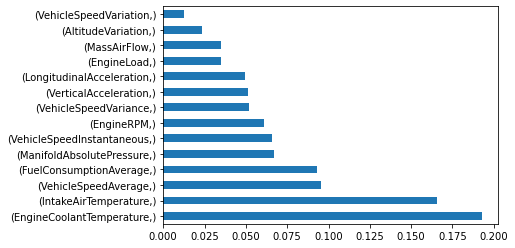

In [19]:
# the higher the score more important or relevant is the feature towards your output variable
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

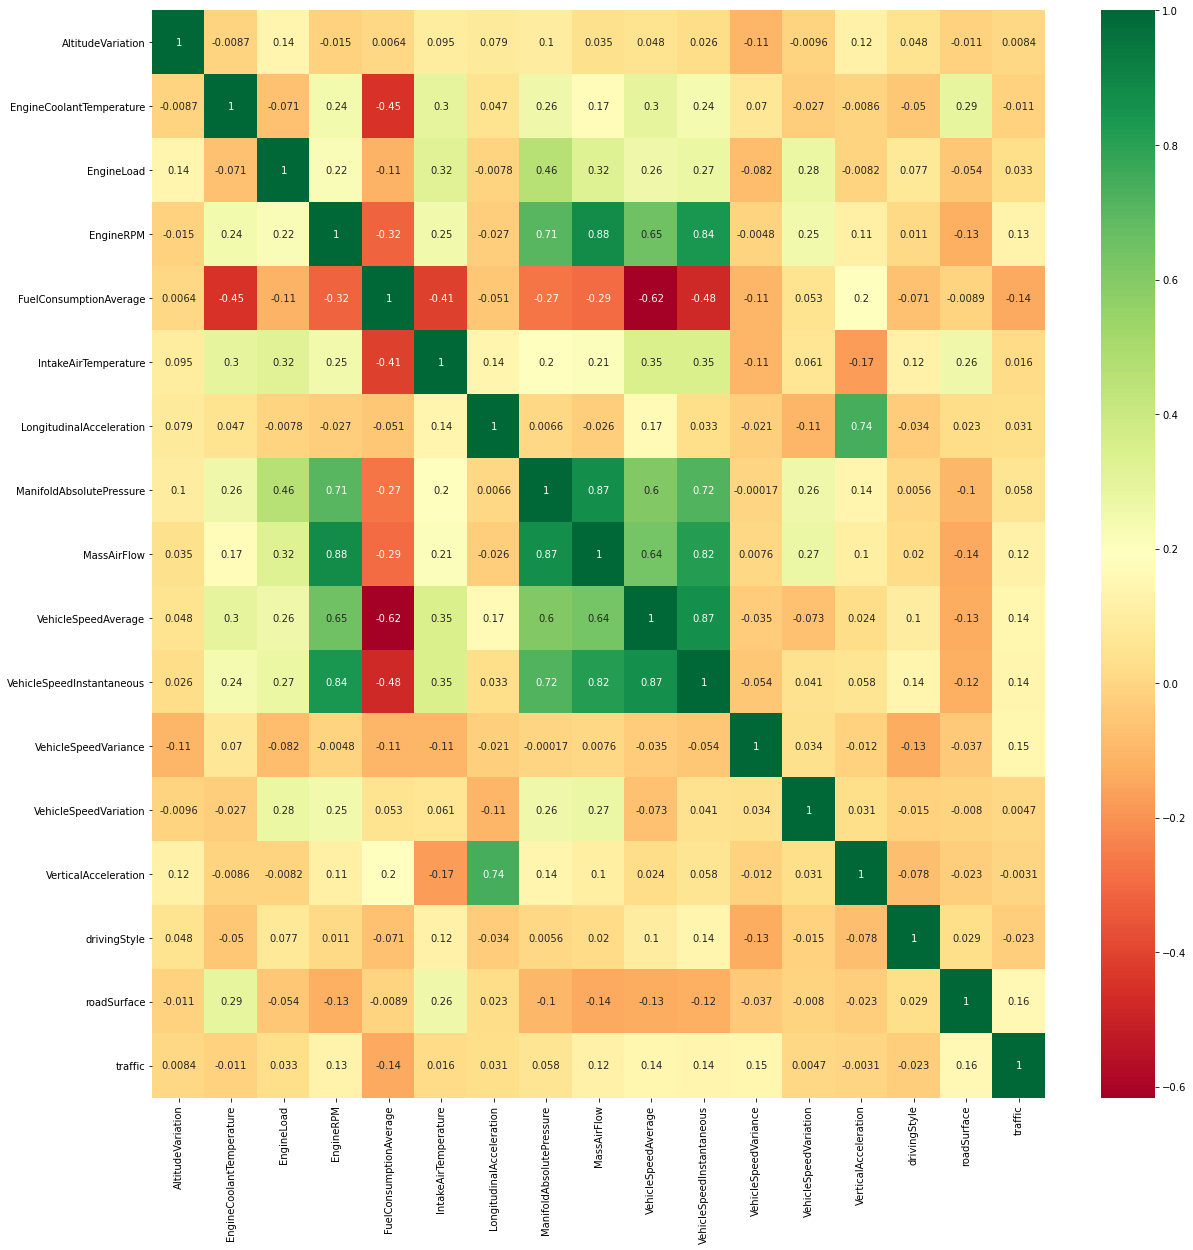

In [20]:
#get correlations of each features in dataset
corrmat = mydf.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(mydf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
myscore

,Specs,Score
9,"(VehicleSpeedAverage,)",649.952487
10,"(VehicleSpeedInstantaneous,)",629.751346
1,"(EngineCoolantTemperature,)",400.938553
7,"(ManifoldAbsolutePressure,)",293.689257
3,"(EngineRPM,)",277.391058
8,"(MassAirFlow,)",217.653908
5,"(IntakeAirTemperature,)",199.888894
13,"(VerticalAcceleration,)",115.316132
11,"(VehicleSpeedVariance,)",35.709477
2,"(EngineLoad,)",15.861194


In [22]:
X

,AltitudeVariation,EngineCoolantTemperature,EngineLoad,EngineRPM,FuelConsumptionAverage,IntakeAirTemperature,LongitudinalAcceleration,ManifoldAbsolutePressure,MassAirFlow,VehicleSpeedAverage,VehicleSpeedInstantaneous,VehicleSpeedVariance,VehicleSpeedVariation,VerticalAcceleration
0,0.619445,0.727273,0.047059,0.567098,0.321173,0.293103,0.296332,0.109756,0.206301,0.108987,0.205776,0.085727,0.134748,0.127961
1,0.625001,0.727273,0.105882,0.533312,0.321656,0.258621,0.304450,0.091463,0.190272,0.112411,0.193141,0.084902,0.142567,0.127207
2,0.641667,0.727273,0.274510,0.504894,0.319713,0.241379,0.302422,0.091463,0.151582,0.115643,0.182310,0.083516,0.144522,0.127019
3,0.686112,0.740260,0.243137,0.511525,0.318321,0.224138,0.301400,0.097561,0.156557,0.116797,0.178700,0.082892,0.152341,0.129284
4,0.686110,0.740260,0.200000,0.539312,0.316032,0.241379,0.299711,0.097561,0.152411,0.118098,0.189531,0.082541,0.167978,0.130226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23757,0.711111,0.896104,0.258824,0.554310,0.191938,0.310345,0.263004,0.164634,0.270692,0.235390,0.230862,0.040321,0.187500,0.125411
23758,0.730555,0.896104,0.117647,0.232554,0.192139,0.310345,0.262900,0.109756,0.232969,0.235142,0.245291,0.040194,0.171875,0.123837
23759,0.733333,0.896104,0.980392,0.395958,0.191131,0.293103,0.250944,0.109756,0.119386,0.234895,0.238077,0.040105,0.148438,0.127850
23760,0.741667,0.883117,0.796078,0.395958,0.191119,0.275862,0.259954,0.146341,0.193865,0.234153,0.238077,0.039595,0.156250,0.129762


In [23]:
# used top 7 features of the SelectKBest feature method
newFdf = X[['VehicleSpeedAverage', 'VehicleSpeedInstantaneous', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure'\
            , 'EngineRPM', 'MassAirFlow' , 'IntakeAirTemperature']]

In [24]:
newFdf

,VehicleSpeedAverage,VehicleSpeedInstantaneous,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature
0,0.108987,0.205776,0.727273,0.109756,0.567098,0.206301,0.293103
1,0.112411,0.193141,0.727273,0.091463,0.533312,0.190272,0.258621
2,0.115643,0.182310,0.727273,0.091463,0.504894,0.151582,0.241379
3,0.116797,0.178700,0.740260,0.097561,0.511525,0.156557,0.224138
4,0.118098,0.189531,0.740260,0.097561,0.539312,0.152411,0.241379
...,...,...,...,...,...,...,...
23757,0.235390,0.230862,0.896104,0.164634,0.554310,0.270692,0.310345
23758,0.235142,0.245291,0.896104,0.109756,0.232554,0.232969,0.310345
23759,0.234895,0.238077,0.896104,0.109756,0.395958,0.119386,0.293103
23760,0.234153,0.238077,0.883117,0.146341,0.395958,0.193865,0.275862


In [25]:
#recheck for nuls
newFdf.isna().sum()

VehicleSpeedAverage          0
VehicleSpeedInstantaneous    0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
dtype: int64

In [26]:
y

0        1
1        1
2        1
3        1
4        1
        ..
23757    1
23758    1
23759    1
23760    1
23761    1
Name: roadSurface, Length: 23762, dtype: int32

In [27]:
# I like datframes
Y  = pd.DataFrame(data=y, columns=['roadSurface'])
Y

,roadSurface
0,1
1,1
2,1
3,1
4,1
...,...
23757,1
23758,1
23759,1
23760,1


In [28]:
# combine again , something funny with headers
result = pd.concat([newFdf, Y], axis=1, ) 
result

,"(VehicleSpeedAverage,)","(VehicleSpeedInstantaneous,)","(EngineCoolantTemperature,)","(ManifoldAbsolutePressure,)","(EngineRPM,)","(MassAirFlow,)","(IntakeAirTemperature,)",roadSurface
0,0.108987,0.205776,0.727273,0.109756,0.567098,0.206301,0.293103,1
1,0.112411,0.193141,0.727273,0.091463,0.533312,0.190272,0.258621,1
2,0.115643,0.182310,0.727273,0.091463,0.504894,0.151582,0.241379,1
3,0.116797,0.178700,0.740260,0.097561,0.511525,0.156557,0.224138,1
4,0.118098,0.189531,0.740260,0.097561,0.539312,0.152411,0.241379,1
...,...,...,...,...,...,...,...,...
23757,0.235390,0.230862,0.896104,0.164634,0.554310,0.270692,0.310345,1
23758,0.235142,0.245291,0.896104,0.109756,0.232554,0.232969,0.310345,1
23759,0.234895,0.238077,0.896104,0.109756,0.395958,0.119386,0.293103,1
23760,0.234153,0.238077,0.883117,0.146341,0.395958,0.193865,0.275862,1


In [29]:
# fix headers
result.columns = ['VehicleSpeedAverage', 'VehicleSpeedInstantaneous', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure'\
            , 'EngineRPM', 'MassAirFlow' , 'IntakeAirTemperature', 'roadSurface']

In [30]:

result

,VehicleSpeedAverage,VehicleSpeedInstantaneous,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,roadSurface
0,0.108987,0.205776,0.727273,0.109756,0.567098,0.206301,0.293103,1
1,0.112411,0.193141,0.727273,0.091463,0.533312,0.190272,0.258621,1
2,0.115643,0.182310,0.727273,0.091463,0.504894,0.151582,0.241379,1
3,0.116797,0.178700,0.740260,0.097561,0.511525,0.156557,0.224138,1
4,0.118098,0.189531,0.740260,0.097561,0.539312,0.152411,0.241379,1
...,...,...,...,...,...,...,...,...
23757,0.235390,0.230862,0.896104,0.164634,0.554310,0.270692,0.310345,1
23758,0.235142,0.245291,0.896104,0.109756,0.232554,0.232969,0.310345,1
23759,0.234895,0.238077,0.896104,0.109756,0.395958,0.119386,0.293103,1
23760,0.234153,0.238077,0.883117,0.146341,0.395958,0.193865,0.275862,1


In [31]:
#check from nuls
result.isna().sum()

VehicleSpeedAverage          0
VehicleSpeedInstantaneous    0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
roadSurface                  0
dtype: int64

In [32]:
#made subsets of each output classifier
SCdf = result.loc[result['roadSurface'] == 1]
UCdf = result.loc[result['roadSurface'] == 2]
FoHdf = result.loc[result['roadSurface'] == 0]

In [33]:
print(len(SCdf),len(UCdf),len(FoHdf))

14235 6280 3247


In [34]:
# get shuffled SCdf with lenght 3247
SampleSCdf = SCdf.sample(3247)
SampleSCdf

,VehicleSpeedAverage,VehicleSpeedInstantaneous,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,roadSurface
3009,0.114974,0.178700,0.896104,0.085366,0.492895,0.125881,0.241379,1
7517,0.561446,0.752708,0.961039,0.548780,0.726239,0.565842,0.189655,1
4128,0.030221,0.120939,0.883117,0.103659,0.343227,0.127954,0.103448,1
9794,0.562498,0.555957,0.935065,0.317073,0.705084,0.425729,0.206897,1
6886,0.291781,0.317689,0.896104,0.335366,0.550047,0.340473,0.206897,1
...,...,...,...,...,...,...,...,...
17356,0.184331,0.331864,0.181818,0.152439,0.536943,0.248445,0.224138,1
3894,0.075258,0.191336,0.857143,0.140244,0.584149,0.181429,0.120690,1
8394,0.094343,0.169675,0.389610,0.079268,0.475529,0.141633,0.189655,1
6552,0.057224,0.117329,0.870130,0.073171,0.335017,0.084565,0.137931,1


In [51]:
# get shuffled UCdf with lenght 3247
SampleUCdf = UCdf.sample(3247)
SampleUCdf

,VehicleSpeedAverage,VehicleSpeedInstantaneous,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,roadSurface
21326,0.245404,0.230862,0.740260,0.097561,0.344490,0.117867,0.189655,2
23611,0.215609,0.396794,0.766234,0.146341,0.486422,0.219981,0.275862,2
22769,0.073188,0.367937,0.961039,0.274390,0.621250,0.324029,0.517241,2
16514,0.296586,0.346293,0.870130,0.128049,0.558415,0.214592,0.431034,2
7430,0.091806,0.120939,0.766234,0.121951,0.387433,0.183640,0.275862,2
...,...,...,...,...,...,...,...,...
18662,0.098409,0.173147,0.870130,0.109756,0.437322,0.194279,0.448276,2
20220,0.039809,0.000000,0.922078,0.091463,0.237922,0.047672,0.327586,2
19283,0.319087,0.216433,0.857143,0.109756,0.589833,0.201603,0.379310,2
23038,0.057374,0.136884,0.480519,0.085366,0.327281,0.126710,0.155172,2


In [52]:
# get shuffled FoHdf with lenght 3247
SampleFoHdf = FoHdf.sample(3247)
SampleFoHdf

,VehicleSpeedAverage,VehicleSpeedInstantaneous,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,roadSurface
21001,0.098656,0.050501,0.415584,0.091463,0.248500,0.067569,0.155172,0
16095,0.389802,0.353508,0.324675,0.128049,0.569940,0.322786,0.155172,0
20446,0.317356,0.303007,0.857143,0.182927,0.508052,0.247616,0.413793,0
15992,0.225128,0.238077,0.467532,0.121951,0.388696,0.213901,0.206897,0
18284,0.221667,0.389580,0.506494,0.140244,0.457215,0.266409,0.293103,0
...,...,...,...,...,...,...,...,...
23529,0.357041,0.238077,0.896104,0.103659,0.408431,0.168578,0.224138,0
13221,0.139330,0.000000,0.506494,0.091463,0.236975,0.049883,0.189655,0
19467,0.011003,0.000000,0.454545,0.085366,0.239501,0.063424,0.172414,0
15926,0.124865,0.000000,0.259740,0.085366,0.242027,0.069918,0.120690,0


In [53]:
#combine 3 sets agin
SampleSetDF = SampleSCdf.append([SampleUCdf, SampleFoHdf])

In [54]:
#check
SampleSetDF.isna().sum()

VehicleSpeedAverage          0
VehicleSpeedInstantaneous    0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
roadSurface                  0
dtype: int64

In [55]:
SampleSetDF

,VehicleSpeedAverage,VehicleSpeedInstantaneous,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,roadSurface
3009,0.114974,0.178700,0.896104,0.085366,0.492895,0.125881,0.241379,1
7517,0.561446,0.752708,0.961039,0.548780,0.726239,0.565842,0.189655,1
4128,0.030221,0.120939,0.883117,0.103659,0.343227,0.127954,0.103448,1
9794,0.562498,0.555957,0.935065,0.317073,0.705084,0.425729,0.206897,1
6886,0.291781,0.317689,0.896104,0.335366,0.550047,0.340473,0.206897,1
...,...,...,...,...,...,...,...,...
23529,0.357041,0.238077,0.896104,0.103659,0.408431,0.168578,0.224138,0
13221,0.139330,0.000000,0.506494,0.091463,0.236975,0.049883,0.189655,0
19467,0.011003,0.000000,0.454545,0.085366,0.239501,0.063424,0.172414,0
15926,0.124865,0.000000,0.259740,0.085366,0.242027,0.069918,0.120690,0


In [56]:
# shuffle the set
SampleSetDF=SampleSetDF.sample(frac=1)

In [57]:
SampleSetDF

,VehicleSpeedAverage,VehicleSpeedInstantaneous,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,roadSurface
15343,0.277671,0.353508,0.870130,0.146341,0.555731,0.302059,0.500000,2
20949,0.104096,0.000000,0.376623,0.091463,0.248500,0.069089,0.137931,0
15093,0.137352,0.057716,0.870130,0.091463,0.269498,0.061490,0.448276,2
19949,0.214620,0.505011,0.701299,0.213415,0.592990,0.286030,0.431034,2
13458,0.238975,0.404009,0.571429,0.103659,0.468424,0.241537,0.224138,0
...,...,...,...,...,...,...,...,...
16105,0.143410,0.158718,0.025974,0.091463,0.375908,0.210032,0.017241,1
18521,0.809276,0.714230,0.870130,0.463415,0.663404,0.447147,0.844828,1
6302,0.447029,0.570397,0.597403,0.170732,0.699400,0.290175,0.086207,2
2888,0.999196,0.969314,0.935065,0.390244,0.759710,0.296532,0.172414,1


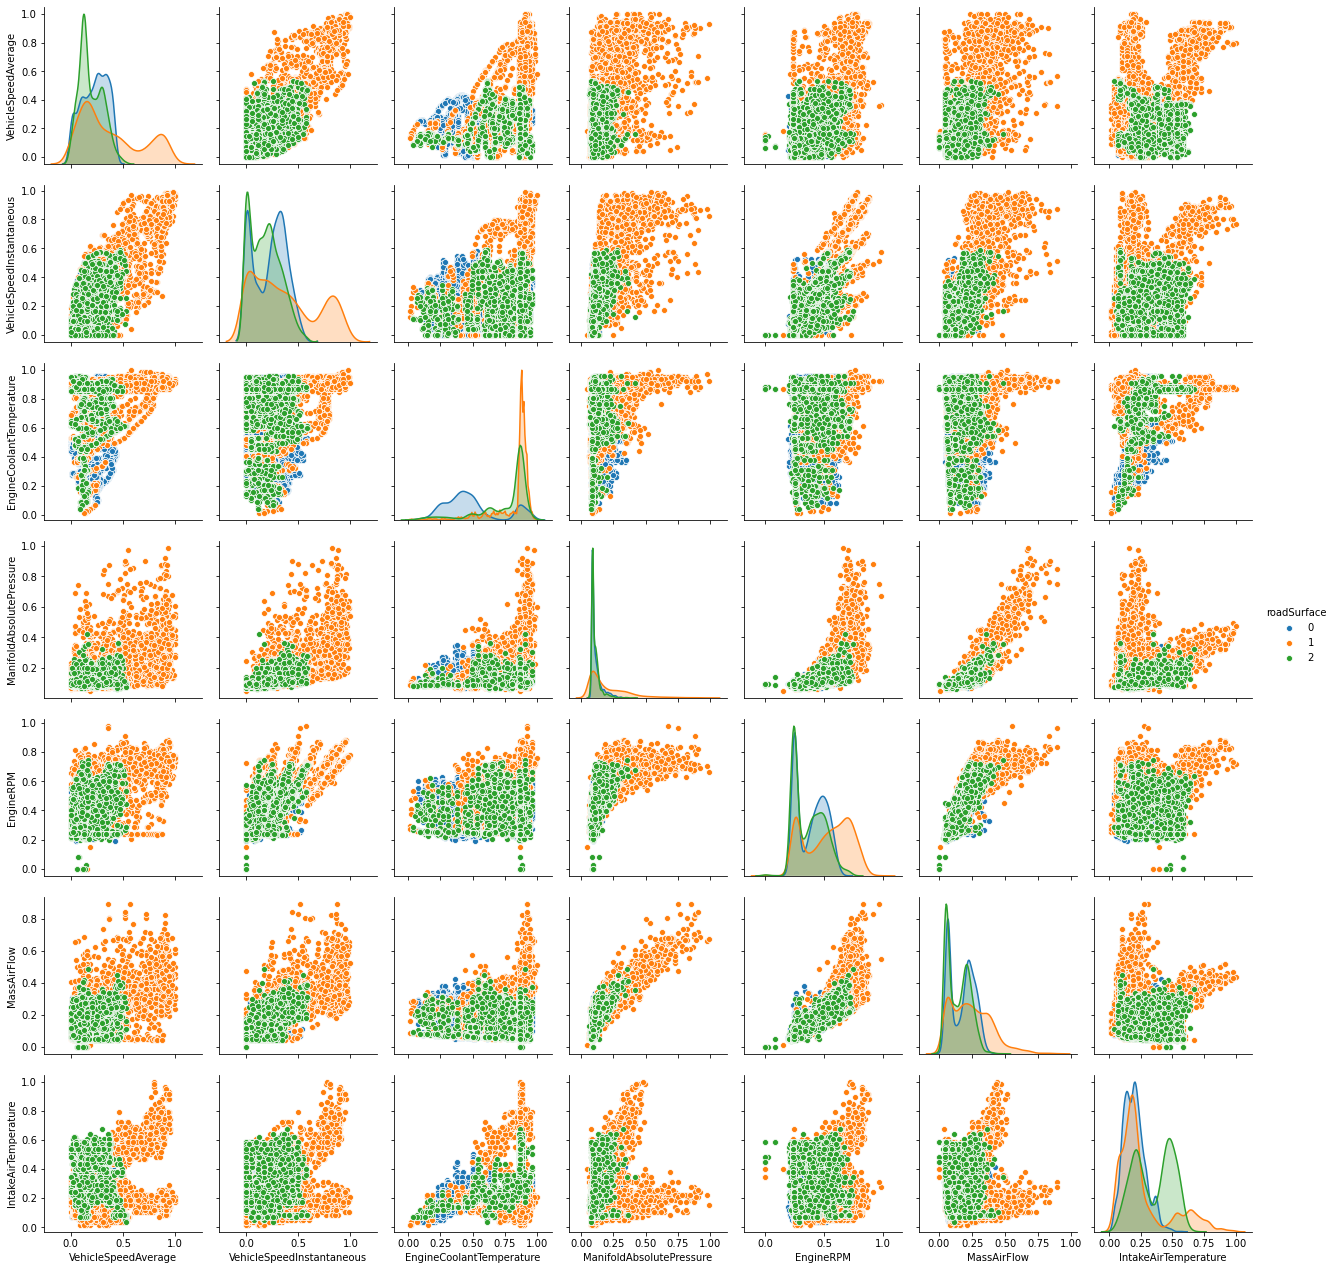

In [42]:
# have a feature check on sample data - for fun
visualise = sns.pairplot(data = SampleSetDF, hue="roadSurface")

In [43]:
# save results
visualise.savefig("output_on_dataset_after_KBest_feature_sellection.png")

In [44]:
# not showing much blue!!

# should I of balanced the dataset before running selectKBest feature selection method??????

# will a better feature selection method result in more blues???

# need to investigate this -- later!

In [58]:
SampleSetDF.isna().sum()

VehicleSpeedAverage          0
VehicleSpeedInstantaneous    0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
roadSurface                  0
dtype: int64

In [59]:
X = SampleSetDF.drop(columns=['roadSurface']).values


In [60]:
y = SampleSetDF.loc[:, ['roadSurface']].values

In [61]:
len(y)

9741

In [62]:
from sklearn import model_selection

# Now using scikit-learn model_selection module, split the iris data into train/test data sets

# keeping 40% reserved for testing purpose and 60% data will be used to train and form model.
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

In [63]:
print(len(X_train), len(X_test),len(Y_train),len(Y_test))

5844 3897 5844 3897


In [64]:
from sklearn import svm
# Build an SVC (Support Vector Classification) model using linear regression
clf_ob = svm.SVC(kernel='rbf').fit(X_train, Y_train.ravel())

In [65]:
print(clf_ob.score(X_test, Y_test))

0.8237105465742879


In [66]:


scores_res = model_selection.cross_val_score(clf_ob, X_test, Y_test.ravel(), cv=5)

# Print the accuracy of each fold (i.e. 5 as above we asked cv 5)
print(scores_res)

# And the mean accuracy of all 5 folds.
print(scores_res.mean())

[0.83333333 0.82307692 0.8254172  0.83311938 0.79589217]
0.822167802244824


In [67]:
## https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a




# KNN https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
Y_train.reshape

<function ndarray.reshape>

In [70]:

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, Y_train.ravel())

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [71]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9145496535796767


In [72]:
print(knn.score(X_test, Y_test))

0.9145496535796767


In [73]:


scores_res = model_selection.cross_val_score(knn, X_test, Y_test.ravel(), cv=5)

# Print the accuracy of each fold (i.e. 5 as above we asked cv 5)
print(scores_res)

# And the mean accuracy of all 5 folds.
print(scores_res.mean())

[0.88974359 0.88461538 0.89473684 0.89602054 0.88318357]
0.8896599848589579


things to do 

1. think I need to look into k folding the training data??
2. look into Logistic Regression
3. implement a confusion matrix. 